In [1]:
# 1️⃣ Load libraries and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('diamonds')
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
print("Shape of dataset:", df.shape)
print("\nData Info:\n")
df.info()

# Summary statistics
df.describe(include='all')


Shape of dataset: (53940, 10)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [3]:
# Missing values check
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum()/len(df))*100
})
print("\nMissing Values:\n", missing)

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())



Missing Values:
          missing_count  missing_percent
carat                0              0.0
cut                  0              0.0
color                0              0.0
clarity              0              0.0
depth                0              0.0
table                0              0.0
price                0              0.0
x                    0              0.0
y                    0              0.0
z                    0              0.0

Duplicate rows: 146


In [4]:
# Convert categorical columns to 'category' dtype
cat_cols = ['cut', 'color', 'clarity']
for col in cat_cols:
    df[col] = df[col].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


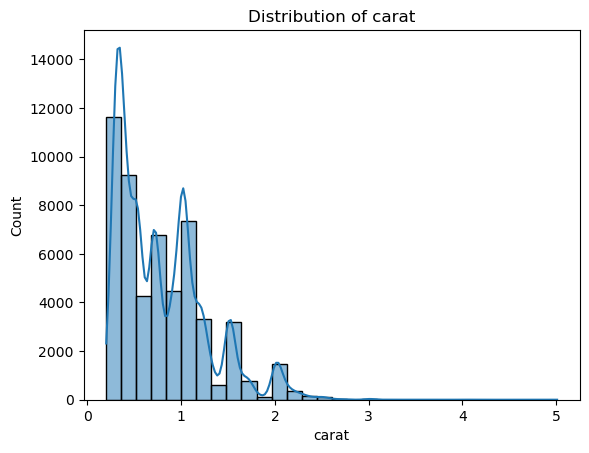

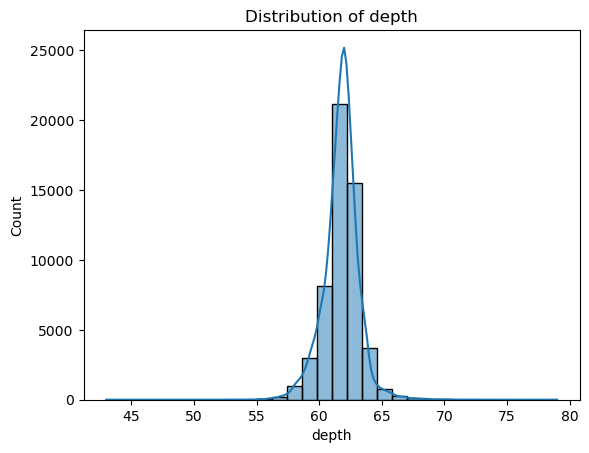

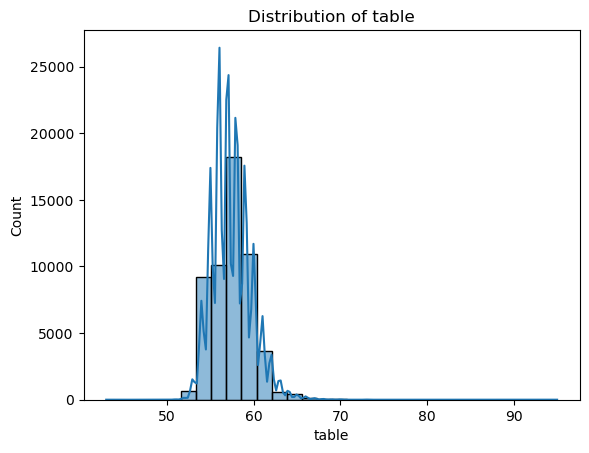

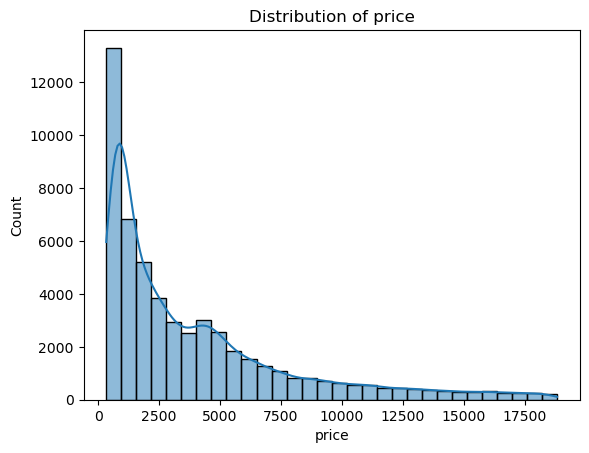

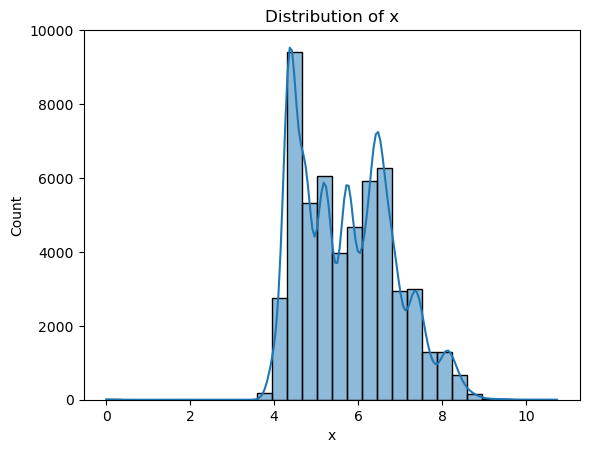

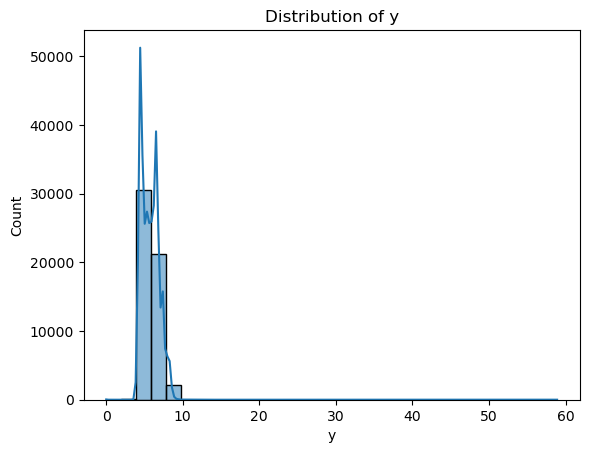

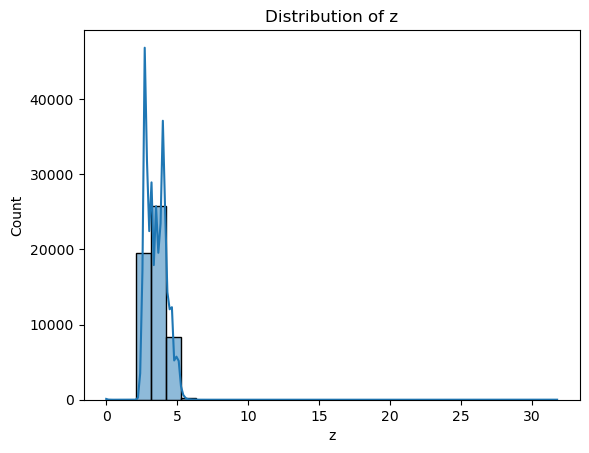

In [5]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].describe()

# Distribution plots
for col in num_cols:
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


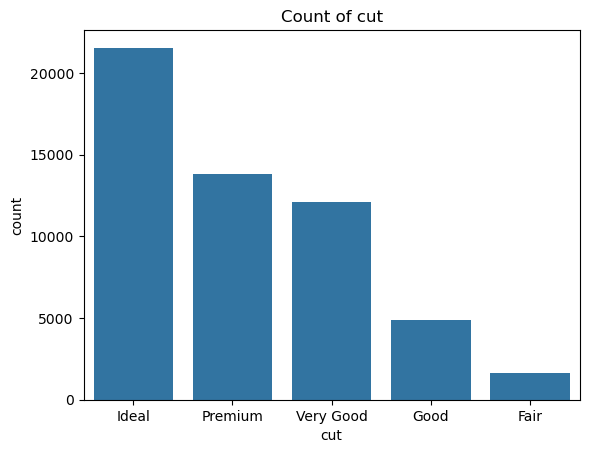

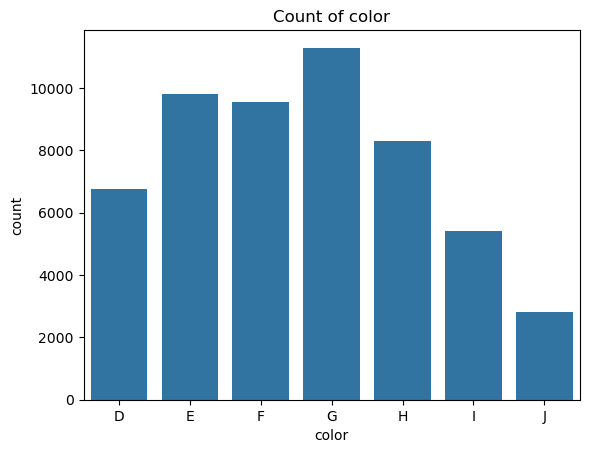

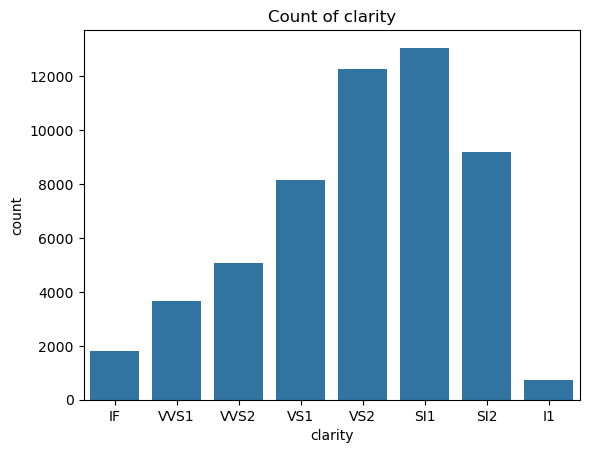

In [6]:
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()


Number of outliers in 'price': 3540


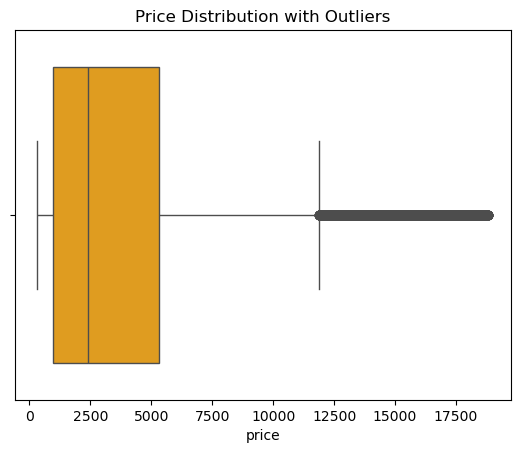

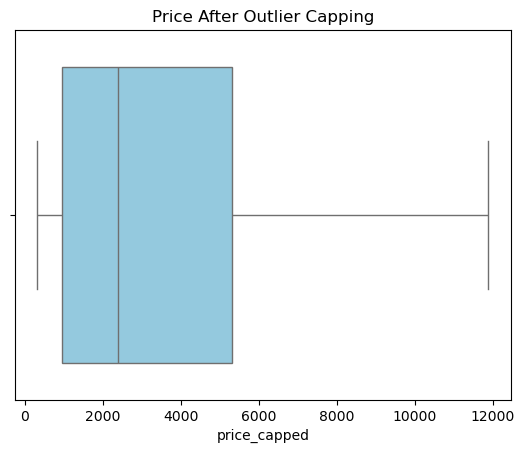

In [7]:
# Outlier detection for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower) | (df['price'] > upper)]
print("Number of outliers in 'price':", len(outliers))

# Visualize
sns.boxplot(x=df['price'], color='orange')
plt.title("Price Distribution with Outliers")
plt.show()

# Cap outliers
df['price_capped'] = df['price'].clip(lower, upper)

sns.boxplot(x=df['price_capped'], color='skyblue')
plt.title("Price After Outlier Capping")
plt.show()


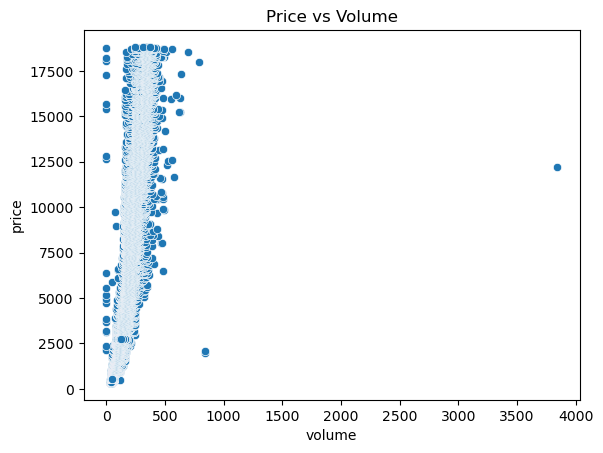

,carat,price,volume,price_per_carat
0,0.23,326,38.202030,1417.391304
1,0.21,326,34.505856,1552.380952
2,0.23,327,38.076885,1421.739130
3,0.29,334,46.724580,1151.724138
4,0.31,335,51.917250,1080.645161


In [9]:
# Create new features
df['volume'] = df['x'] * df['y'] * df['z']
df['price_per_carat'] = df['price'] / df['carat']

sns.scatterplot(x='volume', y='price', data=df)
plt.title("Price vs Volume")
plt.show()

df[['carat', 'price', 'volume', 'price_per_carat']].head()


In [10]:
df.to_csv("diamonds_cleaned.csv", index=False)
print("\nCleaned diamonds dataset saved as diamonds_cleaned.csv")



Cleaned diamonds dataset saved as diamonds_cleaned.csv
